In [ ]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find
from nltk.tokenize import word_tokenize
from nltk import pos_tag

## Machine Learning
import sklearn
import sklearn.metrics as metrics

## Data Visualization
import folium
from tabulate import tabulate
from scipy.stats.kde import gaussian_kde

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-1-cf141d2e4c3c>:48: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  from scipy.stats.kde import gaussian_kde


In [ ]:
# set pandas formatting options
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 500)

In [ ]:
#Read in from pandas
columnNames = ['filePath','hotelName','reviewColumn','ratingScore','groundTruth',
               'date_stamp','streetAddress', 'City',
               'Province','postalCode']

hotelDf = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/kingston-mx50.csv',
                          header=None,
                          names=columnNames)

hotelDf['numReviews'] = hotelDf.groupby('hotelName')['reviewColumn'].transform('count')

In [ ]:
hotelDf.head()

,filePath,hotelName,reviewColumn,ratingScore,groundTruth,date_stamp,streetAddress,City,Province,postalCode,numReviews
0,data_kingston_50/ca/154992/9160041/885042479.html,Quality Inn &amp; Suites,"""Great room, great service, standard hotel breakfast. Decent coffee. However don't count on the internet, couldn't enter my virtual meetings even without video. Let alone stream a tv show or YouTube. Other then that it was a safe, clean and good choice.",3,negative,"April 6, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
1,data_kingston_50/ca/154992/9160041/869263404.html,Quality Inn &amp; Suites,"""This hotel is exceptionally clean and well maintained. The staff is incredibly friendly and helpful. A big thank you to Emma for making our trip incredible! The room was very spacious with the most comfortable bed. I would highly recommend Quality Inn for a superb stay.",5,positive,"November 21, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
2,data_kingston_50/ca/154992/9160041/857888766.html,Quality Inn &amp; Suites,"""We were travelling and needed a room for one night. The carpet was filthy. The bed was damp. As were the sheets and pillows. And the price ridiculous. 160 bucks for a night. Good place to stay away from.",1,negative,"September 1, 2022",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
3,data_kingston_50/ca/154992/9160041/886311292.html,Quality Inn &amp; Suites,"""No nonsense hotel to stay at on the way to Ottawa. Room is renovated, shower is nice, breakfast is good. Staff is friendly. It's all you want for this type of hotel. I would stay here again if I needed a hotel for the same type of thing.",5,positive,"April 15, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14
4,data_kingston_50/ca/154992/9160041/901743337.html,Quality Inn &amp; Suites,"""Stayed on the main floor and it was extremely noisy, lots of hall noise, but worst was the parking construction going on right outside our window. Dump Trucks (paving?) kept backing up with their backup beeper, honking their very loud horns, etc. So much for afternoon nap before our event.\nWish we had been warned of the construction, (especially since i asked for a quiet room) \nThe room was clean, with plenty of towels, toiletries and coffee. \nThe beds were comically soft, to the point ...",3,negative,"July 9, 2023",1530 Robinson Crt,"('Kingston',)",Ontario,K7P 0K4,14


# Q1

In [ ]:
def get_histogram(df: pd.DataFrame, figsize=(10,5)) -> None:
    ## Your code starts here ##
    # plot a historgram of the ratings in "hotelDf"
    fig = plt.figure(figsize=figsize)
    plt.title("Hotel Ratings")
    measure = 'ratingScore'

    if measure=='both':
        x = [df['ratingScore'].values]
        x = [(val-3)/2 for val in x] # rescale from -1 to 1
        y = [df['vader'].values]
        bins = np.linspace(-1, 1, 100)
        plt.hist(x, bins, label='normalized Ground Truth')
        plt.hist(y, bins, label='vader')
        plt.legend(loc='upper right')
        plt.xlabel("Value")
        plt.ylabel("Frequency")
    else:
        plt.hist(df[measure].values)

    plt.xlabel("Value")
    plt.ylabel("Frequency")

    ## end ##

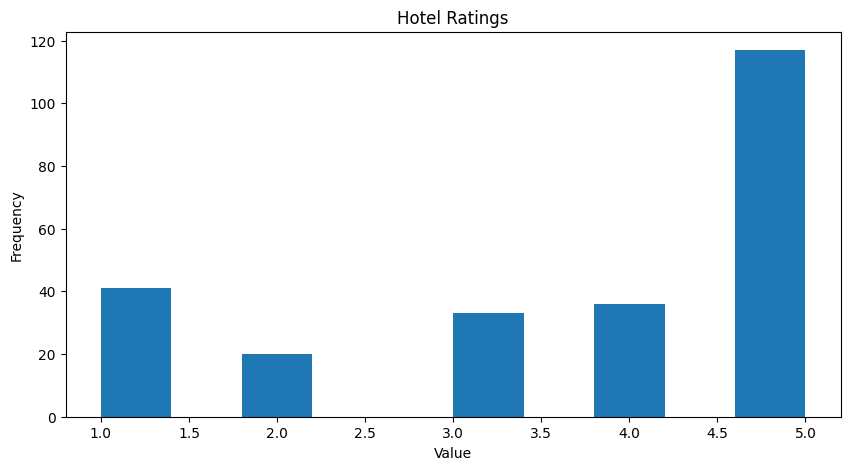

In [ ]:
# DO NOT MODIFY THIS CODE
get_histogram(hotelDf)

# Q2

In [ ]:
def plot_time_series(df: pd.DataFrame) -> None:
  ## Your code starts here ##
  # complete plot_time_series function plot # of reviews and rolling avg rating
  # for 3 hotels over time
  # use rolling average over the last 5 rating scores
  fig, ax = plt.subplots(2, 1, figsize=(15, 7), sharex=True, gridspec_kw={'height_ratios': [1, 2]})

  # plot number of reviews
  for hotel in df['hotelName'].unique()[:3]:
      _df = hotelDf[hotelDf['hotelName'] == hotel].set_index('date_stamp')
      _df.index = pd.to_datetime(_df.index)
      _df = _df.sort_index()
      _df['count'] = 1
      _df['count'].cumsum().plot(ax=ax[0], label = hotel, marker = 'o')
      # rolling average of last 5 review to plot
      _df['ratingScore'].rolling(window=5).mean().plot(ax=ax[1], label = hotel)



  ax[1].set_ylabel('Avg Rating')
  ax[0].set_ylabel('Number of Reviews')



  ## end ##

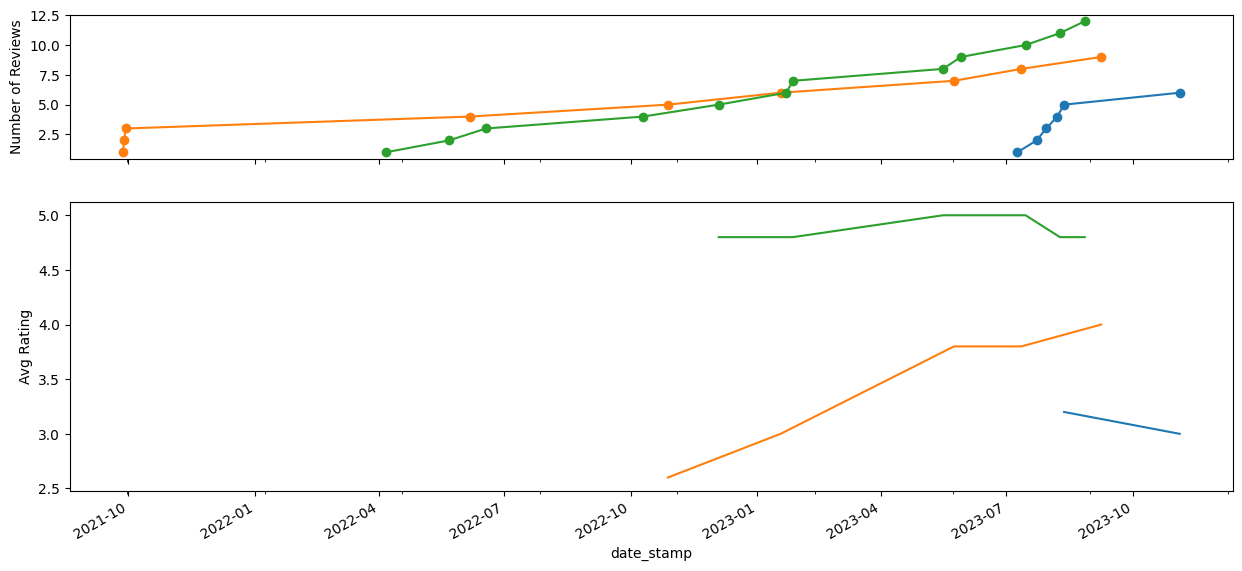

In [ ]:
# DO NOT MODIFY THIS CODE
hotelNames = ['Hochelaga Inn', 'Super 8 by Wyndham Kingston', 'The Rosemount Inn']
plot_time_series(hotelDf[hotelDf['hotelName'].isin(hotelNames)])

# Q3

## (a)

In [ ]:
# DO NOT MODIFY THIS CODE
def get_stop_words():
  stop = set(stopwords.words('english'))
  stop.add('hotel')
  stop.add('room')
  stop.add('rooms')
  stop.add('stay')
  stop.add('staff')
  return stop

def most_frequent_words(df: pd.DataFrame, kwords: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  # find most common 500 words aross all tokens in hotelDf reviews
  stop = get_stop_words()
  counter = Counter()

  reviews = df['reviewColumn'].values

  # go through each review and feed words into counter
  for review in reviews:
    counter.update([word.lower()
                    for word
                    # use nltk word_tokenize function to exract tokens
                    in word_tokenize(review)
                    if word.lower() not in stop and len(word) >= 3])

  # get top k most common
  topk = counter.most_common(kwords)

  ## end ##
  return topk

In [ ]:
# DO NOT MODIFY THIS CODE
topk = most_frequent_words(hotelDf, 500)
topk[:10]

[('clean', 112),
 ('breakfast', 96),
 ('kingston', 87),
 ('great', 80),
 ('one', 80),
 ('good', 79),
 ('friendly', 77),
 ('place', 75),
 ('nice', 75),
 ('would', 74)]

## (b)

In [ ]:
## Your code starts here ##
# caluclate the MI score of the top 500 most common words across all lowercase
# tokens in the dataset
# print data frame showing 5 words with highest MI score and their MI scores

# Use vader to evaluated sentiment of reviews
def evalSentences(sentences, to_df=False, columns=[]):
    # Instantiate an instance to access SentimentIntensityAnalyzer class
    # from vader in nltk
    sid = SentimentIntensityAnalyzer()
    pdlist = []
    if to_df:
        for sentence in tqdm(sentences):
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pd.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf

    else:
        for sentence in tqdm(sentences):
            print("\n" + sentence)
            ss = sid.polarity_scores(sentence)
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

# define
reviews = hotelDf['reviewColumn'].values
reviewDf = evalSentences(reviews, to_df=True, columns=['reviewCol','vader'])
reviewDf = pd.concat([reviewDf, hotelDf[['ratingScore']]], axis=1)
reviewDf.sort_values(by = 'vader')

def dataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDf['reviewCol'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in word_tokenize(reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)

    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDf.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf

finaldf = dataFrameTransformation(hotelDf, reviewDf, topk)

print(reviewDf.head())


def getMI(topk, df, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(df[label_column], df[word[0]])])
    miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

miScoredf = getMI(topk, finaldf)
miScoredf.head()


## end ##

100%|██████████| 247/247 [00:01<00:00, 246.33it/s]


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             reviewCol   vader  ratingScore
0                                                                                                                                                                                                                                                       "Great room, great service, standard hotel breakfast. Decent coffee. However don't count on the internet, couldn't enter my virtual meetings even without video. Let alone stream a tv show or YouTube. Other then that it was a saf

,Word,MI Score
3,great,0.070770
99,dirty,0.066292
11,n't,0.051020
0,clean,0.047330
42,floor,0.041603


## (c)

In [ ]:
def calc_pmi(df: pd.DataFrame, word: str) -> pd.DataFrame:
  ## Your code starts here ##
  # calculate PMI for the words "great" and "dirty" across positive and negative sentiments
  # and for the case that the word is present and not present
  # print 2 dataframes summarizing the PMI results
  pmilist=[]
  N = df.shape[0]
  for sentiment in ['positive','negative']:
      for word_present in [False,True]:
          px = sum(df['groundTruth']==sentiment)
          py = sum(df[word]==word_present)
          pxy = len(df[(df['groundTruth']==sentiment) & (df[word]==word_present)])

          if pxy==0:#Log 0 cannot happen
              pmi = math.log((pxy+0.0001)*N/(px*py))
          else:
              pmi = math.log(pxy*N/(px*py))

          pmilist.append([sentiment]+[word_present]+[px]+[py]+[pxy]+[pmi])

  # assemble the results into a dataframe
  pmidf = pd.DataFrame(pmilist)
  pmidf.columns = ['sentiment (x)','word_present (y)','px','py','pxy','pmi']
  ## end ##
  return pmidf

In [ ]:
# calc_pmi for "great"
calc_pmi(finaldf,'great')


,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,153,187,98,-0.167191
1,positive,True,153,60,55,0.391939
2,negative,False,94,187,89,0.223621
3,negative,True,94,60,5,-1.518813


In [ ]:
# calc_pmi for "dirty"
calc_pmi(finaldf,'dirty')


,sentiment (x),word_present (y),px,py,pxy,pmi
0,positive,False,153,231,153,0.066971
1,positive,True,153,16,0,-11.503979
2,negative,False,94,231,78,-0.119615
3,negative,True,94,16,16,0.966094


## (d)

In [ ]:
# DO NOT MODIFY ANY CODE IN THIS CELL

# to make the results more useable, we clean up the tree results shown above.
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()
stopword_list = get_stop_words()

# generator, create item one a time
def get_terms(tree):
    for leaf in leaves(tree):

        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case...
def normalise(word,lemmatizer=lemmatizer, stemmer=stemmer):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word, stopword_list=stopword_list):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stopword_list)
    return accepted

# Flatten phrase lists to get tokens for analysis
def flatten_phrase_lists(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [ ]:
# NNS - plural noun
# NNP - proper noun
# JJ - adjective

# Noun phrases including prepositional phrases
grammar = r"""
    NBAR: # Noun Phrase
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns

    NP: # noun in nbar - as a phrase
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""
# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

In [ ]:
def getTopKNP(df: pd.DataFrame, kNPs: int) -> list[tuple[str, int]]:
  ## Your code starts here ##
  # get Df with top 50 most common noun phrases across the reviews
  # print out top 10 most common noun phrases with their frequencies
  counter = Counter()
  reviews = df['reviewCol'].values

  for review in reviews:
          counter.update(flatten_phrase_lists([word
                          for word
                          # get_terms calls acceptable_word, normalise, leaves, and flatten_phrase_lists
                          in get_terms(chunker.parse(pos_tag(word_tokenize(review))))
                          ]))
  topk = counter.most_common(kNPs)
  ## end ##
  return topk

In [ ]:
# Print top 10 most common noun phrases
topk_phrase = getTopKNP(finaldf, 50)
topk_phrase[:10]


[('front desk', 32),
 ('next time', 10),
 ('great locat', 9),
 ('coffe maker', 9),
 ('comfort bed', 8),
 ('air condition', 8),
 ('park lot', 6),
 ('mini fridg', 6),
 ('green acr inn', 6),
 ('great experi', 5)]

## (e)

In [ ]:
## Your code starts here ##
# use hotels with at least 15 reviews
# find avg rating for each of these hotels
# print the hotel and average rating of the hotel with highest and lowest average rating
# using only the reviews for each hotel (ignore reviews of all other hotels)
# determine 5 noun phrases with the highest PMI for positive and negative sentiments separately
# do this for both highest rated and lowest rated hotels
# total should print 4 dataframes, 5 rows each and 2 columns plus header row
#  (Pmi for postiive and negative sentiment for each of the 2 hotels)

# get hotels with at least 15 reviews
hotel_df = hotelDf[hotelDf['numReviews'] >= 15]

# get avg rating for each hotel
avg_ratings = hotel_df.groupby('hotelName')['ratingScore'].mean()

# print hotel with highest and lowest avg rating
print(avg_ratings.idxmax(), avg_ratings.max())
print(avg_ratings.idxmin(),"; Avg Rating: ", avg_ratings.min())

def getTopKNP(df, kNPs):

    counter = Counter()
    reviews = df['reviewColumn'].values

    for review in reviews:
            counter.update(flatten_phrase_lists([word
                            for word
                            # get_terms calls acceptable_word, normalise, leaves, and flatten_phrase_lists
                            in get_terms(chunker.parse(pos_tag(word_tokenize(review))))
                            ]))
    topk = counter.most_common(kNPs)
    return topk


def NPdataFrameTransformation(hotelDf, reviewDF, topk):
    reviews = reviewDF['reviewCol'].values

    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten_phrase_lists([word
                                       for word
                                       in get_terms(chunker.parse(pos_tag(word_tokenize(reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)


    #Prepare freqReviewDf
    freqReviewDf = pd.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','groundTruth']].join(finalreviewDf)
    return finaldf

# Compute PMI for all terms and all possible labels
def pmiForAllCal(df, topk_word, gt_sentiment, label_column='groundTruth'):
    #Try calculate all the pmi for top k and store them into one pmidf dataframe

    index = [x[0] for x in topk_word]
    pmiDf = pd.DataFrame(index=index, columns=['pmi'])

    for (word, count) in tqdm(topk_word):
        pmiDf.at[word, 'pmi'] = pmiCalc(df,word,gt_sentiment,label_column)

    return pmiDf


def pmiCalc(df, word, gt_sentiment, label_column='groundTruth'):
    N = df.shape[0]

    px = sum(df[label_column]==gt_sentiment)
    py = sum(df[word]==True)
    pxy = len(df[(df[label_column]==gt_sentiment) & (df[word]==True)])

    if pxy==0 and (px != 0 and py != 0):#Log 0 cannot happen
        pmi = math.log((pxy+0.0001)*N/(px*py))
    elif px == 0 or py == 0 or pxy == 0:
        pmi = math.log(0.0001)
    else:
        pmi = math.log(pxy*N/(px*py))
    return pmi


## end ##

Residence Inn by Marriott Kingston Water&#39;s Edge 4.782608695652174
Bayside Inn &amp; Waterfront Suites ; Avg Rating:  2.65625


In [ ]:
# get top 5 noun phrases with highest PMI for positive and negative sentiments
# Top Hotel Positive PMI

# for highest rated hotel
highest_rated = hotel_df[hotel_df['hotelName'] == avg_ratings.idxmax()]
top_phrases_df = getTopKNP(highest_rated, 50)

top_final_df = NPdataFrameTransformation(highest_rated, reviewDf, top_phrases_df)

top_positive_pmi = pmiForAllCal(top_final_df, top_phrases_df, 'positive')
top_positive_pmi.sort_values('pmi', ascending= 0).head()

100%|██████████| 50/50 [00:00<00:00, 442.52it/s]


,pmi
resid inn,0.044452
resid inn water edge.\nbest wish,0.044452
first week,0.044452
first experi,0.044452
good thing,0.044452


In [ ]:
# Top Hotel Negative PMI
top_positive_pmi = pmiForAllCal(top_final_df, top_phrases_df, 'negative')
top_positive_pmi.sort_values('pmi', ascending= 0).head()


100%|██████████| 50/50 [00:00<00:00, 760.73it/s]


,pmi
\n\nmi wife,3.135494
cold air,3.135494
partial refund.\n\na,3.135494
frank exchang,3.135494
forgiv soul,3.135494


In [ ]:
# Bottom Hotel Positive PMI
# for highest rated hotel
lowest_rated = hotel_df[hotel_df['hotelName'] == avg_ratings.idxmin()]
top_phrases_df = getTopKNP(lowest_rated, 50)

bottom_final_df = NPdataFrameTransformation(lowest_rated, reviewDf, top_phrases_df)

top_positive_pmi = pmiForAllCal(bottom_final_df, top_phrases_df, 'positive')
top_positive_pmi.sort_values('pmi', ascending= 0).head()

100%|██████████| 50/50 [00:00<00:00, 1140.18it/s]


,pmi
new favorit place,1.163151
baysid motel,1.163151
great place,1.163151
famili holiday,1.163151
great view,1.163151


In [ ]:
# Bottom Hotel Negative PMI
top_positive_pmi = pmiForAllCal(bottom_final_df, top_phrases_df, 'negative')
top_positive_pmi.sort_values('pmi', ascending= 0).head()

100%|██████████| 50/50 [00:00<00:00, 1190.73it/s]


,pmi
spider web,0.374693
trip advisor,0.374693
taxi home,0.374693
king bed,0.374693
decent size,0.374693


# Q4

## (a)

In [ ]:
# Write the grammar RegEx for a noun phrase (named NP) that may or may not start with
# a determiner (DT tag), followed by any number of adjectives (including comparative and
# superlative adjectives using JJ, JJS, or JJR tags) or possibly none, followed by at least 1
# singular or plural noun (NN or NNS tags)

grammar = r"""
  NP: {<DT>?<JJ|JJS|JJR>*<NN|NNS>+}
"""

# DO NOT MODIFY THIS CODE
chunker = nltk.RegexpParser(grammar)

## (b)

In [ ]:
## Your code starts here ##

# Calculate the PMI of each of the top 50 most common noun phrases with the positive sen-
# timent. Print a DataFrame showing the 5 noun phrases with the highest PMI with positive
# sentiment. Repeat the same for negative sentiment.

# get top 50 noun phrases
topk_phrase = getTopKNP(hotel_df, 50)
## end ##

In [ ]:
# Positive PMI
transformed_df = NPdataFrameTransformation(hotel_df, reviewDf, topk_phrase)

# get PMI for top 50 noun phrases
pmi_positive = pmiForAllCal(transformed_df, topk_phrase, 'positive')

# get top 5 noun phrases with highest PMI for positive sentiment
pmi_positive.sort_values(by='pmi', ascending=False).head()

100%|██████████| 50/50 [00:00<00:00, 1053.65it/s]


,pmi
coffe maker,0.536578
resid inn,0.536578
great way,0.536578
reason price,0.536578
qualiti bed,0.536578


In [ ]:
# Negative PMI

# get PMI for top 50 noun phrases
pmi_negative = pmiForAllCal(transformed_df, topk_phrase, 'negative')

# get top 5 noun phrases with highest PMI for negative sentiment
pmi_negative.sort_values(by='pmi', ascending=False).head()

100%|██████████| 50/50 [00:00<00:00, 963.02it/s]


,pmi
horribl condit,0.878864
front desk person,0.878864
older ladi,0.878864
park lot,0.878864
attach restaur,0.878864


## (c)

Answer:

PMI analysis in this context can help identify which aspects of
hotels are most frequently associated with positive sentiments.
Higher PMI values indicate a strong association between the noun
 phrase and positive sentiment, suggesting that these aspects
 are particularly appreciated by customers. Conversely, by
 focusing on what's not mentioned in positive contexts
 (or analyzing noun phrases with high PMI in negative contexts),
 we might infer areas of dissatisfaction.

